# Supervised and Unsupervised Learning Algorithms for Genre Classification and Song Popularity

**<span style="color:CornflowerBlue">by Samantha Garcia, Brainstation Data Science Student (May - August 2022) </span>**

## Notebook 6.e.: Appendix Notebook - Discarded Dataset Investigation - Increase and Diversify Datapoints

### Table of Contents

    [1. Recap](#introduction)
        1.1 Need to Diversify Genres
        1.2 Spotify API
        1.3 Details of New Dataset
    
    [2. Cleaning New Dataset]
        [2.1 ](#datasource)
        [2.2 ](#)
        [2.3 ](#)
    
    [3. Combining New Dataset](#data)
        [3.1 ](#)
        [3.2 ](#)

    [4. Revised Features Distributions Analysis by Genre]
        [4.1 ](#)
        [4.2 ](#)
        [4.3 ](#)
---     

## 1. Recap

### 1.1 Need to Diversify Genres



---

In [2]:
import numpy as np
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler, MinMaxScaler

from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

In [3]:
songs_df1 = pd.read_csv('tracks_features.csv')

In [4]:
songs_df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1204025 entries, 0 to 1204024
Data columns (total 24 columns):
 #   Column            Non-Null Count    Dtype  
---  ------            --------------    -----  
 0   id                1204025 non-null  object 
 1   name              1204025 non-null  object 
 2   album             1204025 non-null  object 
 3   album_id          1204025 non-null  object 
 4   artists           1204025 non-null  object 
 5   artist_ids        1204025 non-null  object 
 6   track_number      1204025 non-null  int64  
 7   disc_number       1204025 non-null  int64  
 8   explicit          1204025 non-null  bool   
 9   danceability      1204025 non-null  float64
 10  energy            1204025 non-null  float64
 11  key               1204025 non-null  int64  
 12  loudness          1204025 non-null  float64
 13  mode              1204025 non-null  int64  
 14  speechiness       1204025 non-null  float64
 15  acousticness      1204025 non-null  float64
 16  

In [5]:
songs_df1.drop(songs_df1.iloc[:,2:9],axis=1, inplace=True)

In [6]:
songs_df1.drop('release_date',axis=1, inplace=True)

In [7]:
songs_df1.drop('duration_ms',axis=1, inplace=True)

In [8]:
songs_df1.drop_duplicates(inplace=True, ignore_index=True)

In [9]:
songs_df1.head()

id                   name  danceability  energy  key  \
0  7lmeHLHBe4nmXzuXc0HDjk                Testify         0.470   0.978    7   
1  1wsRitfRRtWyEapl0q22o8        Guerrilla Radio         0.599   0.957   11   
2  1hR0fIFK2qRG3f3RF70pb7       Calm Like a Bomb         0.315   0.970    7   
3  2lbASgTSoDO7MTuLAXlTW0              Mic Check         0.440   0.967   11   
4  1MQTmpYOZ6fcMQc56Hdo7T  Sleep Now In the Fire         0.426   0.929    2   

   loudness  mode  speechiness  acousticness  instrumentalness  liveness  \
0    -5.399     1       0.0727       0.02610          0.000011    0.3560   
1    -5.764     1       0.1880       0.01290          0.000071    0.1550   
2    -5.424     1       0.4830       0.02340          0.000002    0.1220   
3    -5.830     0       0.2370       0.16300          0.000004    0.1210   
4    -6.729     1       0.0701       0.00162          0.105000    0.0789   

   valence    tempo  time_signature  year  
0    0.503  117.906             4.0  1999  
1    0.489  103.680             4.0  1999  
2    0.370  149.749             4.0  1999  
3    0.574   96.752             4.0  1999  
4    0.539  127.059             4.0  1999

In [10]:
songs_df1.shape

(1204025, 15)

In [11]:
songs_df2 = songs_df1.drop(['id','name'],axis=1)
songs_df2

danceability  energy  key  loudness  mode  speechiness  acousticness  \
0               0.470   0.978    7    -5.399     1       0.0727       0.02610   
1               0.599   0.957   11    -5.764     1       0.1880       0.01290   
2               0.315   0.970    7    -5.424     1       0.4830       0.02340   
3               0.440   0.967   11    -5.830     0       0.2370       0.16300   
4               0.426   0.929    2    -6.729     1       0.0701       0.00162   
...               ...     ...  ...       ...   ...          ...           ...   
1204020         0.264   0.966    5    -6.970     0       0.0672       0.00935   
1204021         0.796   0.701   11    -6.602     0       0.0883       0.10400   
1204022         0.785   0.796    9    -5.960     0       0.0564       0.03040   
1204023         0.665   0.856    6    -6.788     0       0.0409       0.00007   
1204024         0.736   0.708    2    -9.279     0       0.0539       0.01680   

         instrumentalness  liveness  valence    tempo  time_signature  year  
0                0.000011    0.3560    0.503  117.906             4.0  1999  
1                0.000071    0.1550    0.489  103.680             4.0  1999  
2                0.000002    0.1220    0.370  149.749             4.0  1999  
3                0.000004    0.1210    0.574   96.752             4.0  1999  
4                0.105000    0.0789    0.539  127.059             4.0  1999  
...                   ...       ...      ...      ...             ...   ...  
1204020          0.002240    0.3370    0.415  159.586             4.0  2014  
1204021          0.644000    0.0749    0.781  121.980             4.0  2014  
1204022          0.918000    0.0664    0.467  121.996             4.0  2014  
1204023          0.776000    0.1170    0.227  124.986             4.0  2014  
1204024          0.296000    0.2790    0.204  117.991             4.0  2014  

[1204025 rows x 13 columns]

In [12]:
songs_df2.describe().T

count         mean        std   min          25%  \
danceability      1204025.0     0.493057   0.189669   0.0     0.356000   
energy            1204025.0     0.509536   0.294684   0.0     0.252000   
key               1204025.0     5.194151   3.536731   0.0     2.000000   
loudness          1204025.0   -11.808703   6.982132 -60.0   -15.254000   
mode              1204025.0     0.671459   0.469683   0.0     0.000000   
speechiness       1204025.0     0.084382   0.115991   0.0     0.035100   
acousticness      1204025.0     0.446751   0.385201   0.0     0.037600   
instrumentalness  1204025.0     0.282861   0.376284   0.0     0.000008   
liveness          1204025.0     0.201599   0.180459   0.0     0.096800   
valence           1204025.0     0.427987   0.270485   0.0     0.191000   
tempo             1204025.0   117.634352  30.937047   0.0    94.054000   
time_signature    1204025.0     3.832494   0.561183   0.0     4.000000   
year              1204025.0  2007.327815  12.101174   0.0  2002.000000   

                         50%        75%       max  
danceability         0.50100     0.6330     1.000  
energy               0.52400     0.7660     1.000  
key                  5.00000     8.0000    11.000  
loudness            -9.79100    -6.7170     7.234  
mode                 1.00000     1.0000     1.000  
speechiness          0.04460     0.0723     0.969  
acousticness         0.38900     0.8610     0.996  
instrumentalness     0.00808     0.7190     1.000  
liveness             0.12500     0.2450     1.000  
valence              0.40300     0.6440     1.000  
tempo              116.72600   137.0460   248.934  
time_signature       4.00000     4.0000     5.000  
year              2009.00000  2015.0000  2020.000

In [13]:
# year has min values '0' let's have a look
songs_df2['year'].value_counts()

2020    69726
2019    67276
2006    56945
2007    56287
2018    56167
        ...  
1909       25
1935       20
1908       19
1900       14
0          10
Name: year, Length: 101, dtype: int64

In [14]:
# drop 0 values in year
songs_df2 = songs_df2[songs_df1.year != 0]

In [15]:
# let's drop everything before 1980
songs_df2 = songs_df2[songs_df1.year >=1970]
songs_df2['year'].value_counts()

C:\Users\smgar\AppData\Local\Temp/ipykernel_13436/3799460779.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  songs_df2 = songs_df2[songs_df1.year >=1970]


2020    69726
2019    67276
2006    56945
2007    56287
2018    56167
2017    51308
2008    50475
2005    49977
2013    49048
2016    47427
2015    46558
2011    45642
2009    45563
2012    45108
2014    45005
2010    44550
2004    38696
2003    34996
2002    30861
2000    30575
2001    29378
1999    25931
1998    21013
1997    20229
1996    17840
1995    17417
1994    14130
1993    11017
1992     9639
1991     8380
1990     7453
1989     5095
1988     4545
1987     3314
1986     2727
1985     2596
1984     2571
1980     2119
1979     2106
1976     1985
1983     1977
1977     1962
1972     1938
1978     1923
1981     1897
1975     1806
1973     1762
1982     1754
1974     1389
1971     1202
1970     1110
Name: year, dtype: int64

In [16]:
songs_df2.describe().T

count         mean        std     min          25%  \
danceability      1190395.0     0.493631   0.189737     0.0     0.357000   
energy            1190395.0     0.511599   0.294794     0.0     0.254000   
key               1190395.0     5.196252   3.537650     0.0     2.000000   
loudness          1190395.0   -11.772846   6.987528   -60.0   -15.190000   
mode              1190395.0     0.670490   0.470035     0.0     0.000000   
speechiness       1190395.0     0.084537   0.116044     0.0     0.035100   
acousticness      1190395.0     0.443225   0.384919     0.0     0.036200   
instrumentalness  1190395.0     0.283083   0.376347     0.0     0.000008   
liveness          1190395.0     0.201249   0.180167     0.0     0.096800   
valence           1190395.0     0.427653   0.270322     0.0     0.191000   
tempo             1190395.0   117.699613  30.924476     0.0    94.123500   
time_signature    1190395.0     3.833419   0.559924     0.0     4.000000   
year              1190395.0  2007.894800   9.282881  1970.0  2003.000000   

                         50%        75%       max  
danceability         0.50100     0.6340     1.000  
energy               0.52700     0.7690     1.000  
key                  5.00000     8.0000    11.000  
loudness            -9.73400    -6.6890     7.234  
mode                 1.00000     1.0000     1.000  
speechiness          0.04460     0.0725     0.969  
acousticness         0.37900     0.8580     0.996  
instrumentalness     0.00817     0.7190     1.000  
liveness             0.12500     0.2450     1.000  
valence              0.40300     0.6440     1.000  
tempo              116.87000   137.1200   248.934  
time_signature       4.00000     4.0000     5.000  
year              2009.00000  2015.0000  2020.000

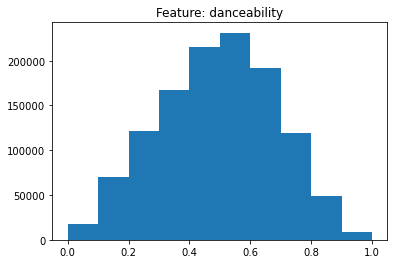

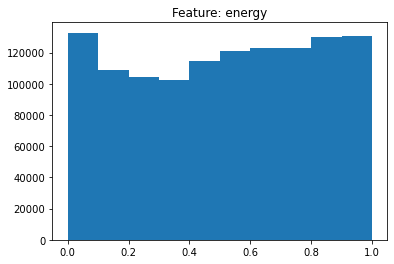

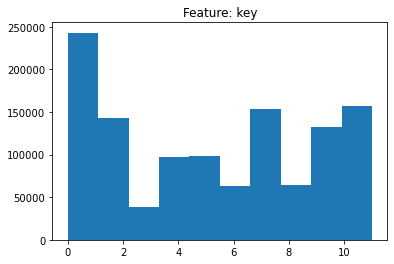

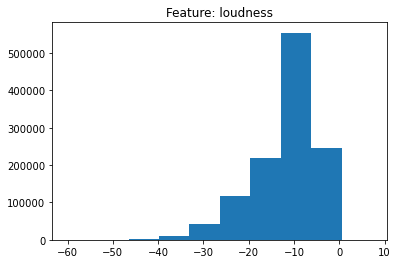

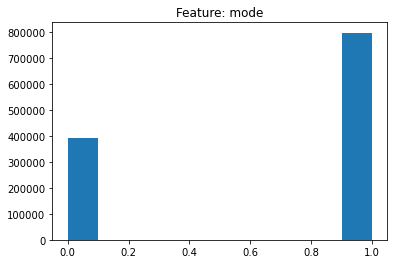

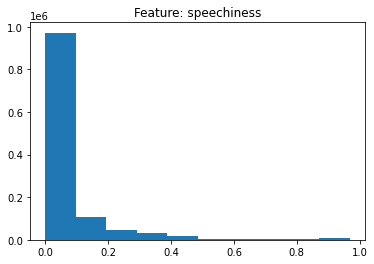

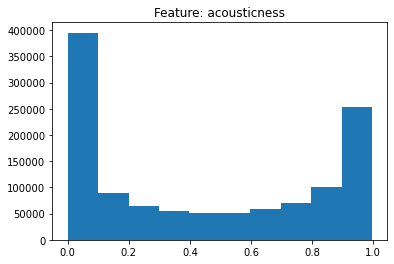

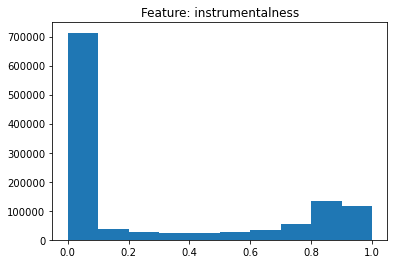

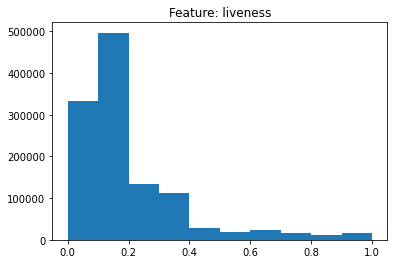

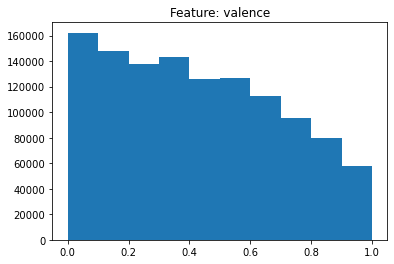

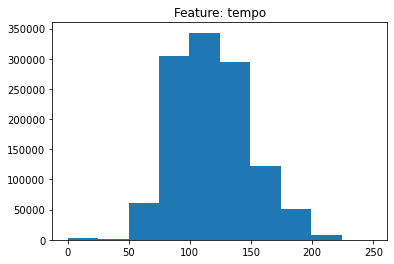

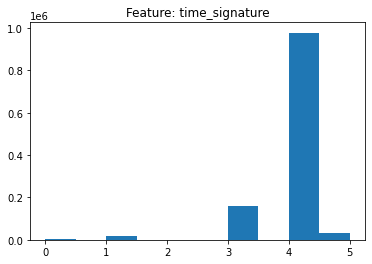

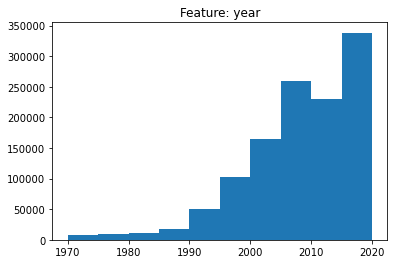

In [17]:
# plot histograms for the unsupervised dataset
for col in songs_df2:
    plt.figure()
    plt.title(f'Feature: {col}')
    plt.hist(songs_df2[col])
    plt.show()

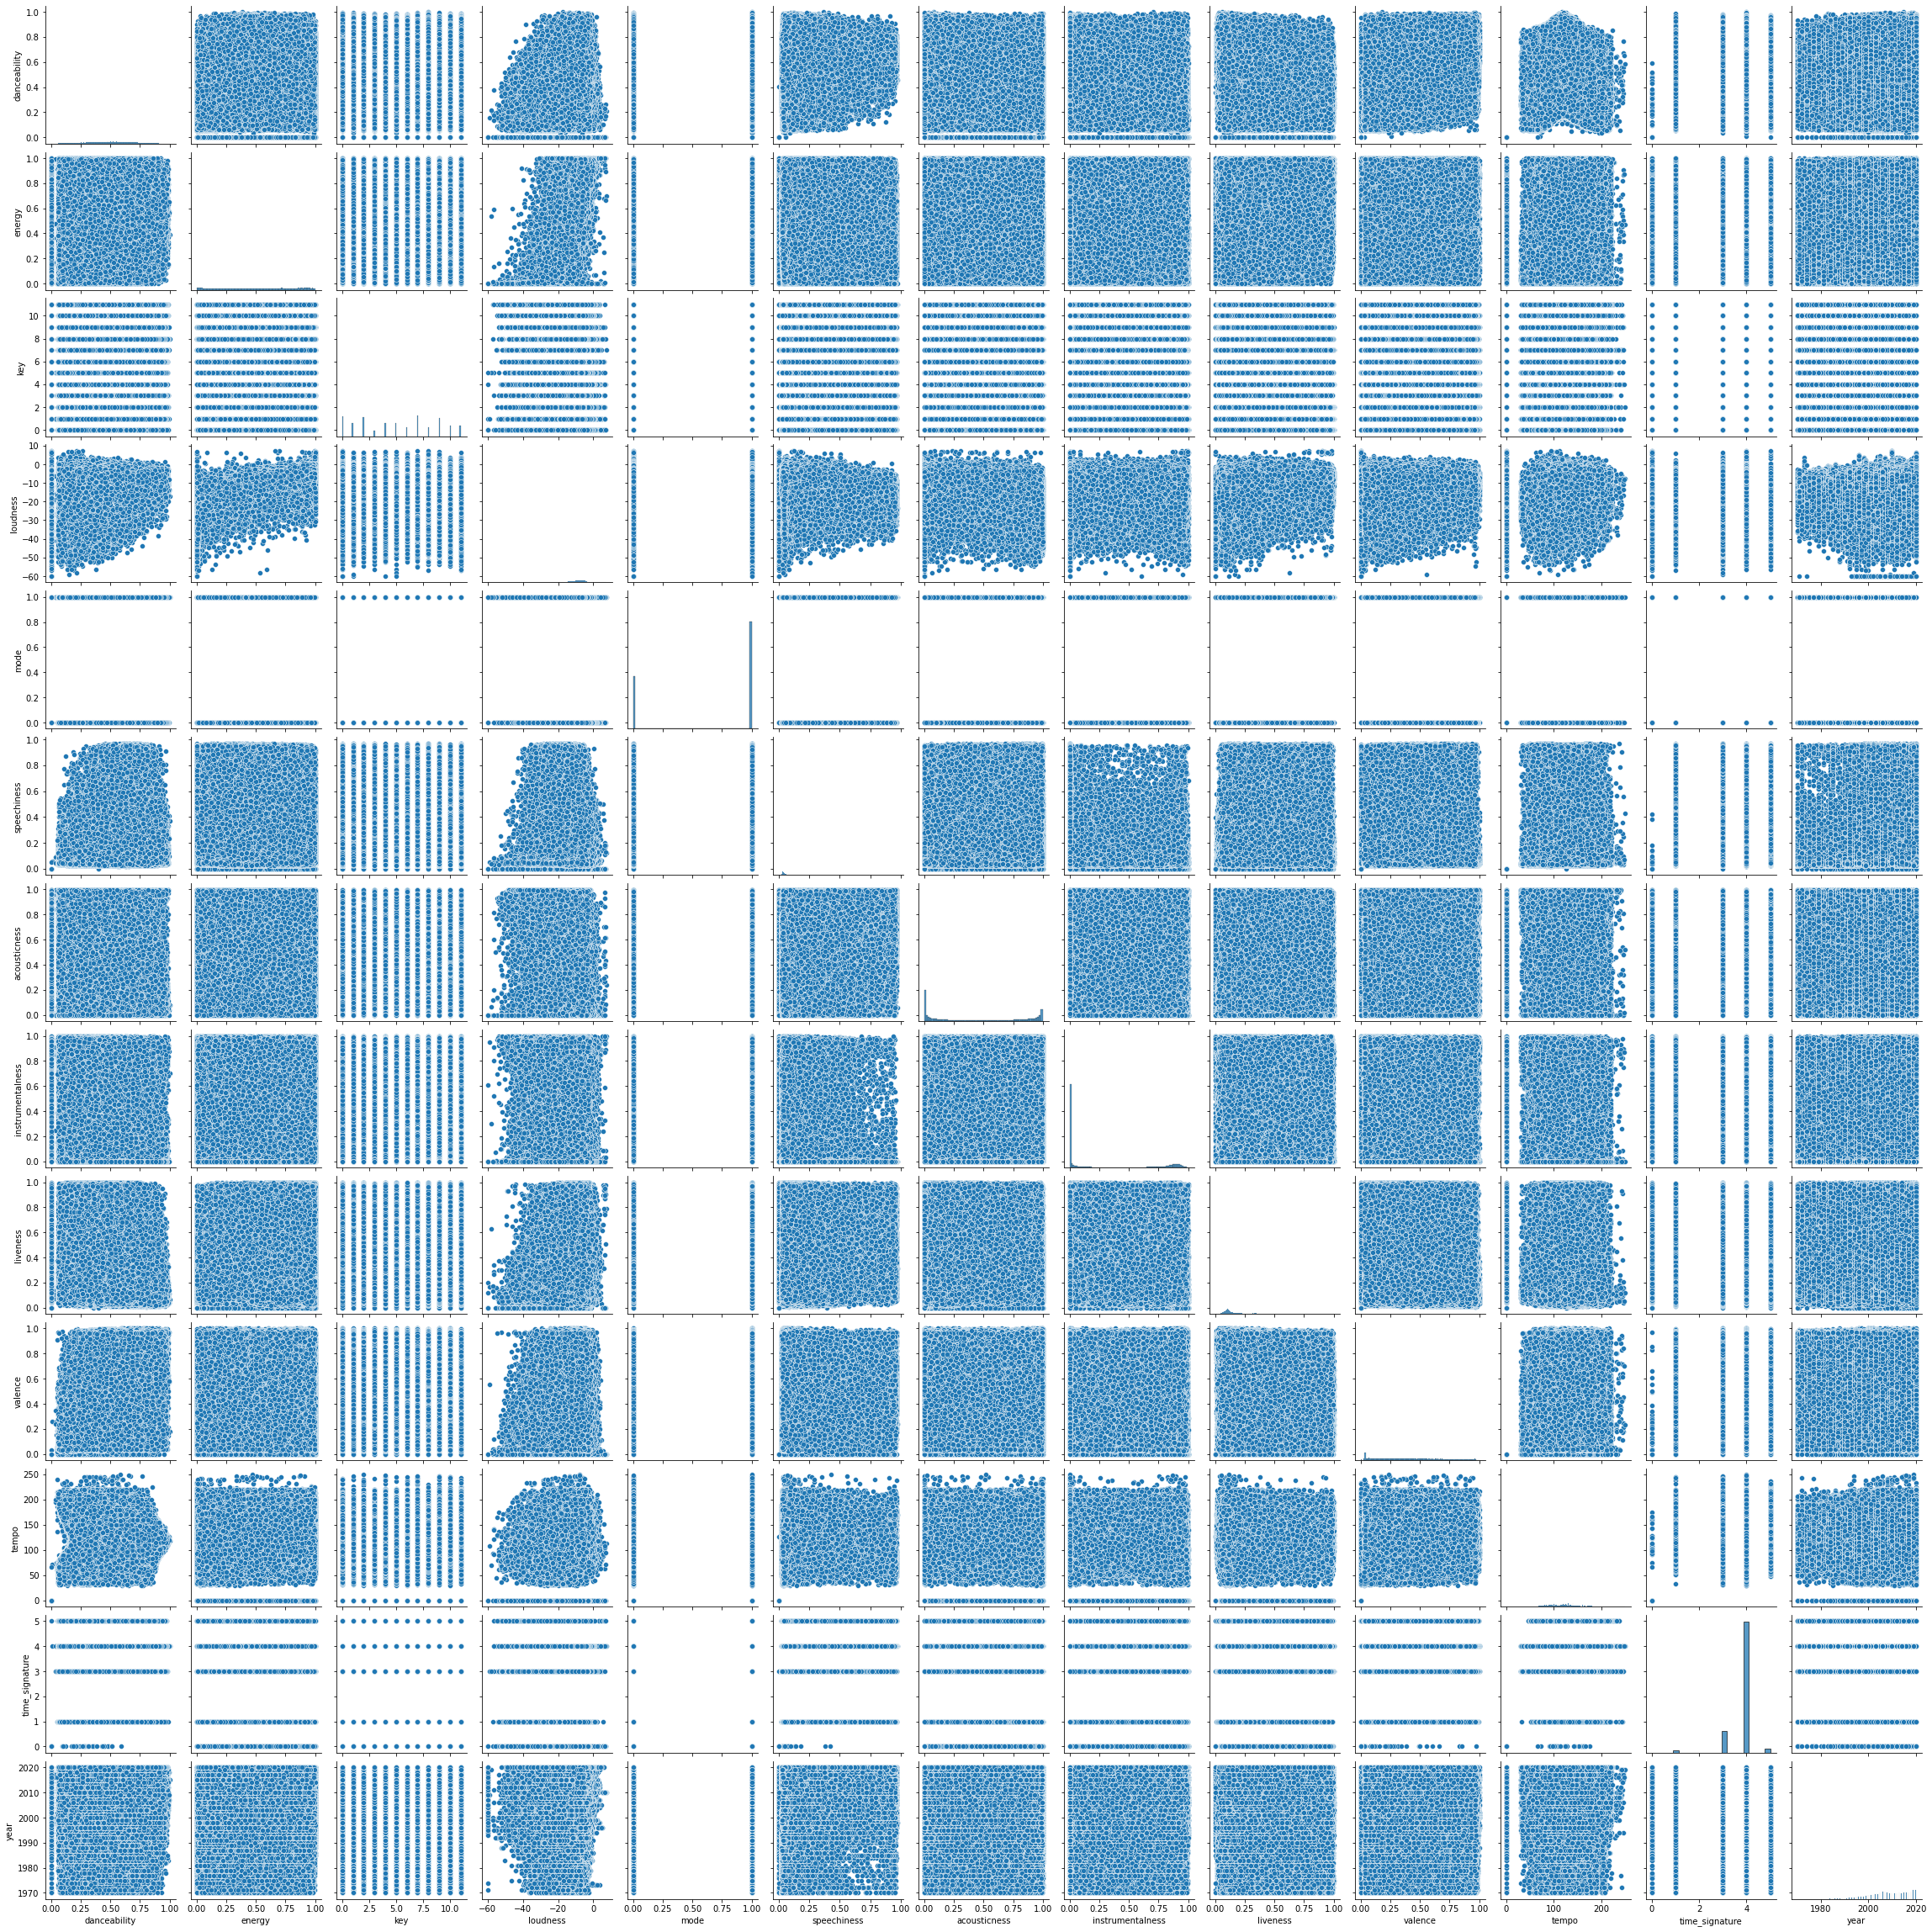

In [17]:
sns.pairplot(songs_df2)

In [18]:
# instantiate both scalers
std_scaler = StandardScaler()
minmax_scaler = MinMaxScaler()

# Transform data
songs_df2__std_scaled = std_scaler.fit_transform(songs_df2)
songs_df2__minmax_scaled = minmax_scaler.fit_transform(songs_df2)

In [22]:
songs_df2__std_scaled = pd.DataFrame(songs_df2__std_scaled)
songs_df2__std_scaled

0         1         2         3         4         5         6   \
0       -0.124548  1.582124  0.509872  0.912175  0.701032 -0.102001 -1.083670   
1        0.555340  1.510888  1.640567  0.859939  0.701032  0.891587 -1.117963   
2       -0.941468  1.554987  0.509872  0.908597  0.701032  3.433724 -1.090684   
3       -0.282661  1.544810  1.640567  0.850494 -1.426468  1.313840 -0.728010   
4       -0.356448  1.415906 -0.903496  0.721836  0.701032 -0.124407 -1.147268   
...           ...       ...       ...       ...       ...       ...       ...   
1190390 -1.210261  1.541418 -0.055475  0.687346 -1.426468 -0.149397 -1.127186   
1190391  1.593619  0.642485  1.640567  0.740011 -1.426468  0.032430 -0.881289   
1190392  1.535645  0.964744  1.075219  0.831889 -1.426468 -0.242465 -1.072499   
1190393  0.903190  1.168276  0.227198  0.713392 -1.426468 -0.376035 -1.151295   
1190394  1.277392  0.666230 -0.903496  0.356900 -1.426468 -0.264009 -1.107831   

               7         8         9         10        11        12  
0       -0.752158  0.858930  0.278731  0.006674  0.297506 -0.958194  
1       -0.751999 -0.256704  0.226940 -0.453350  0.297506 -0.958194  
2       -0.752181 -0.439868 -0.213275  1.036377  0.297506 -0.958194  
3       -0.752177 -0.445418  0.541380 -0.677380  0.297506 -0.958194  
4       -0.473189 -0.679091  0.411905  0.302653  0.297506 -0.958194  
...           ...       ...       ...       ...       ...       ...  
1190390 -0.746235  0.753472 -0.046807  1.354474  0.297506  0.657684  
1190391  0.959000 -0.701293  1.307134  0.138414  0.297506  0.657684  
1190392  1.687051 -0.748471  0.145556  0.138932  0.297506  0.657684  
1190393  1.309740 -0.467620 -0.742274  0.235619  0.297506  0.657684  
1190394  0.034321  0.431548 -0.827358  0.009423  0.297506  0.657684  

[1190395 rows x 13 columns]

In [23]:
# create dataframe to see what components have been given to the X_train features so we can plot
old_colnames = list(songs_df2__std_scaled.columns)
new_colnames= list(songs_df2.columns)
rename_dict = {a:b for a,b in zip(old_colnames,new_colnames)}
songs_df2__std_scaled.rename(columns=rename_dict, inplace=True)
songs_df2__std_scaled

danceability    energy       key  loudness      mode  speechiness  \
0           -0.124548  1.582124  0.509872  0.912175  0.701032    -0.102001   
1            0.555340  1.510888  1.640567  0.859939  0.701032     0.891587   
2           -0.941468  1.554987  0.509872  0.908597  0.701032     3.433724   
3           -0.282661  1.544810  1.640567  0.850494 -1.426468     1.313840   
4           -0.356448  1.415906 -0.903496  0.721836  0.701032    -0.124407   
...               ...       ...       ...       ...       ...          ...   
1190390     -1.210261  1.541418 -0.055475  0.687346 -1.426468    -0.149397   
1190391      1.593619  0.642485  1.640567  0.740011 -1.426468     0.032430   
1190392      1.535645  0.964744  1.075219  0.831889 -1.426468    -0.242465   
1190393      0.903190  1.168276  0.227198  0.713392 -1.426468    -0.376035   
1190394      1.277392  0.666230 -0.903496  0.356900 -1.426468    -0.264009   

         acousticness  instrumentalness  liveness   valence     tempo  \
0           -1.083670         -0.752158  0.858930  0.278731  0.006674   
1           -1.117963         -0.751999 -0.256704  0.226940 -0.453350   
2           -1.090684         -0.752181 -0.439868 -0.213275  1.036377   
3           -0.728010         -0.752177 -0.445418  0.541380 -0.677380   
4           -1.147268         -0.473189 -0.679091  0.411905  0.302653   
...               ...               ...       ...       ...       ...   
1190390     -1.127186         -0.746235  0.753472 -0.046807  1.354474   
1190391     -0.881289          0.959000 -0.701293  1.307134  0.138414   
1190392     -1.072499          1.687051 -0.748471  0.145556  0.138932   
1190393     -1.151295          1.309740 -0.467620 -0.742274  0.235619   
1190394     -1.107831          0.034321  0.431548 -0.827358  0.009423   

         time_signature      year  
0              0.297506 -0.958194  
1              0.297506 -0.958194  
2              0.297506 -0.958194  
3              0.297506 -0.958194  
4              0.297506 -0.958194  
...                 ...       ...  
1190390        0.297506  0.657684  
1190391        0.297506  0.657684  
1190392        0.297506  0.657684  
1190393        0.297506  0.657684  
1190394        0.297506  0.657684  

[1190395 rows x 13 columns]

### PCA and t-SNE for Visualisation

To understand whether our clustering is likely to perform well, we want to see if our data is easily separated in groups. It's difficult to see whether we have distinct groups within the above 13x13 pairplots so let's use PCA as a visualisation tool.

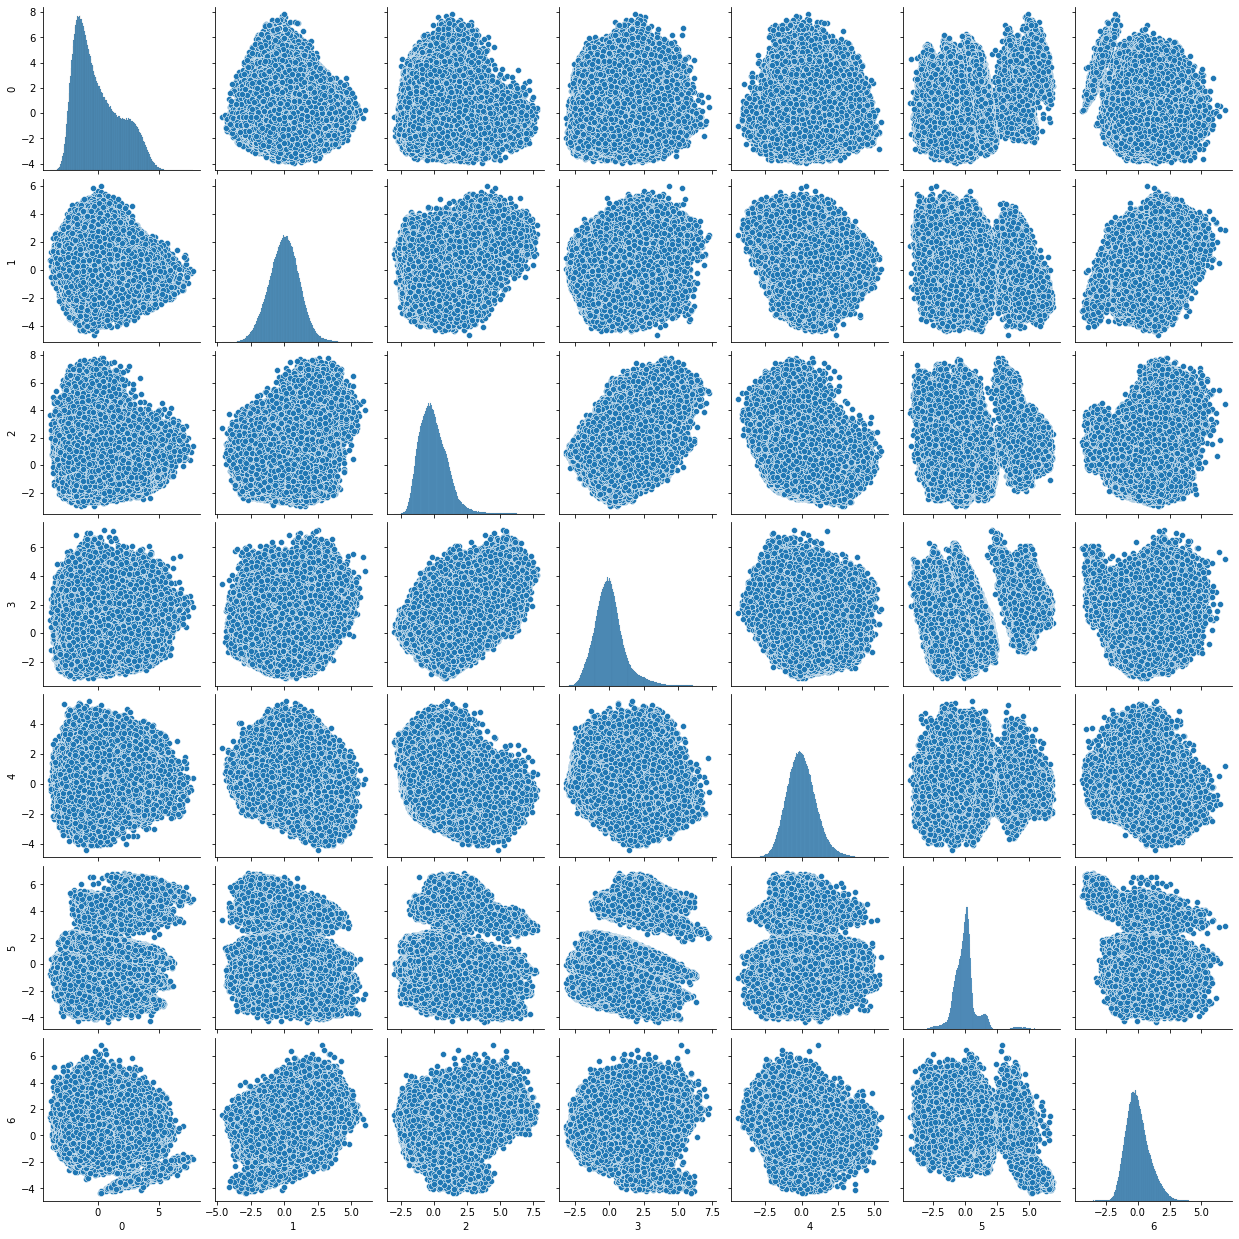

In [19]:
pca = PCA(n_components = 7)
pca_data_std_scaled = pca.fit_transform(songs_df2__std_scaled)
sns.pairplot(pd.DataFrame(pca_data_std_scaled))

In [20]:
# Instantiate t-SNE. Set verbose = 0 to not print out all the details
tsne = TSNE(n_components = 3, random_state = 4, verbose = 0)
# Fit_Transform t-SNE
tsne_data = tsne.fit_transform(songs_df2__std_scaled)

In [22]:
# create tSNE dataframe
tsne_df = pd.DataFrame(tsne_data, columns = [f'tSNE D{i+1}' for i in range(tsne_data.shape[1])])

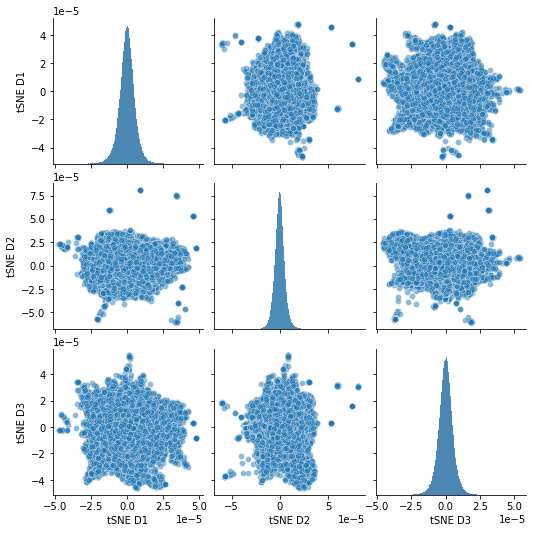

In [24]:
# visualise
sns.pairplot(tsne_df, plot_kws = {'alpha': 0.5})

In [24]:
songs_df2__std_scaled.to_csv('../data/songs_df2__std_scaled.csv')